In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr
from matplotlib import font_manager, rc

plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

In [136]:
from datetime import datetime, timedelta

start = '2000-01-01'
end = '2022-12-01'

# S&P 
SnP = pd.DataFrame(yf.download('^GSPC',start,end,interval='1mo')['Adj Close'])
SnP.index = pd.to_datetime(SnP.index)

# 2년물 국채
T2Y = pd.read_csv('GS2.csv')
T2Y.index=T2Y['DATE']
T2Y.index = pd.to_datetime(T2Y['DATE'])
T2Y = T2Y.drop(['DATE'], axis='columns')

# 10년물 국채
T10Y = pd.read_csv('GS10.csv')
T10Y.index=T10Y['DATE']
T10Y.index = pd.to_datetime(T10Y['DATE'])
T10Y = T10Y.drop(['DATE'], axis='columns')

# 천연고무
rubber = pd.read_csv('RUBBER.csv')
rubber.index = pd.to_datetime(rubber['DATE'])
rubber = rubber.drop(['DATE'], axis='columns')

# 금
gold = pd.read_csv('USGOLD.csv')
tmp = [list(gold['일자'])[i][0:8] + '01' for i in range(len(gold['일자']))]
gold.index = pd.to_datetime(tmp)
gold = gold.drop(['일자'], axis='columns')

# 원유
oil = pd.read_csv('WTI.csv')
oil.index = pd.to_datetime(oil['DATE'])
oil = oil.drop(['DATE'], axis='columns')

# 기준금리
br1 = pd.read_csv('BR1.csv')
br1.columns = ['일자', '원유가']
br2 = pd.read_csv('BR2.csv')
br2.columns = ['일자', '원유가']

base = pd.concat([br1, br2], axis=0)
base.index = pd.to_datetime(base['일자'])
base = base.query('index.dt.day==1')
base = base.drop(['일자'], axis='columns')


# data
dataset = pd.concat([SnP, T2Y, T10Y, oil, gold, rubber, base], axis=1)
dataset.columns = ['S&P', 'T2Y', 'T10Y', 'OIL', 'GOLD', 'RUBBER', 'BASE']
dataset = dataset.dropna(axis=0)

[*********************100%***********************]  1 of 1 completed


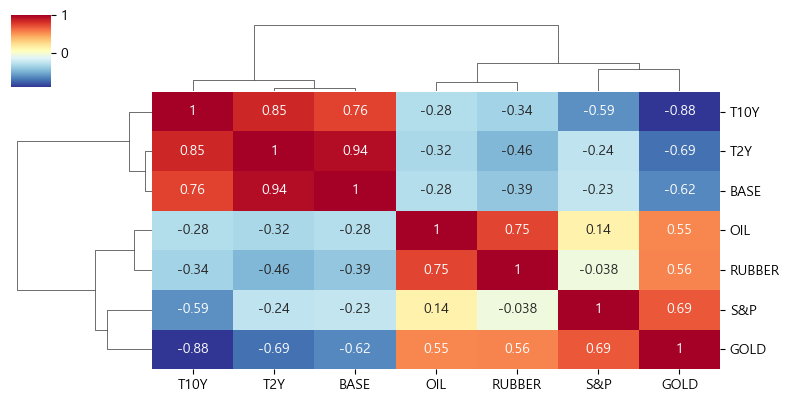

In [160]:
sns.clustermap(data=dataset.corr(), annot=True, cmap='RdYlBu_r', figsize=(8,4))

In [151]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

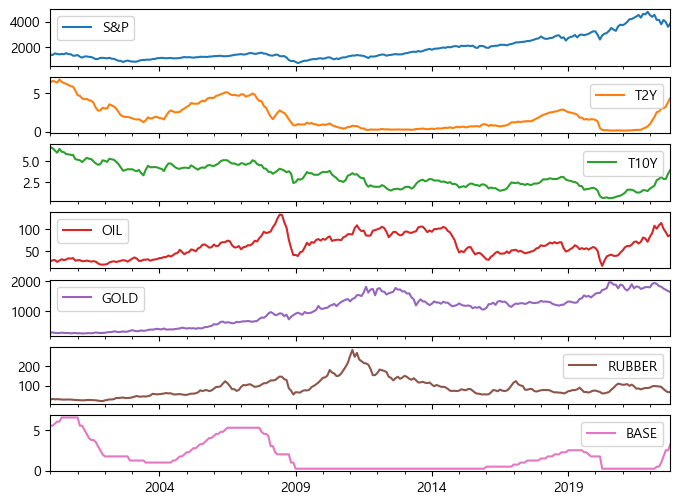

In [162]:
dataset.plot(subplots=True, figsize=(8,6))

In [163]:
fit = VAR(dataset).fit(maxlags=2)
display(fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Dec, 2022
Time:                     14:44:15
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    14.8658
Nobs:                     272.000    HQIC:                   14.0326
Log likelihood:          -4429.10    FPE:                    711124.
AIC:                      13.4738    Det(Omega_mle):         488376.
--------------------------------------------------------------------
Results for equation S&P
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            93.617325        72.783914            1.286           0.198
L1.S&P            0.760635         0.063211           12.033           0.000
L1.T2Y           11.315573        47.968382            0.236           0.814
L

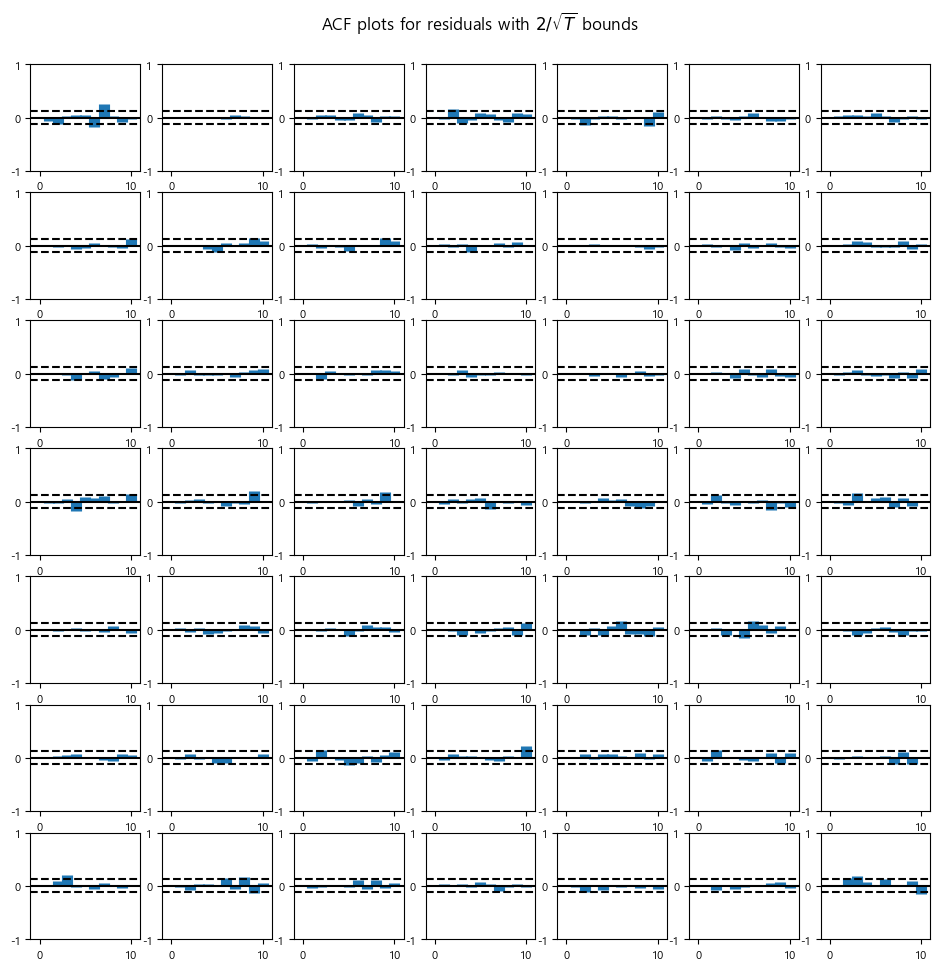

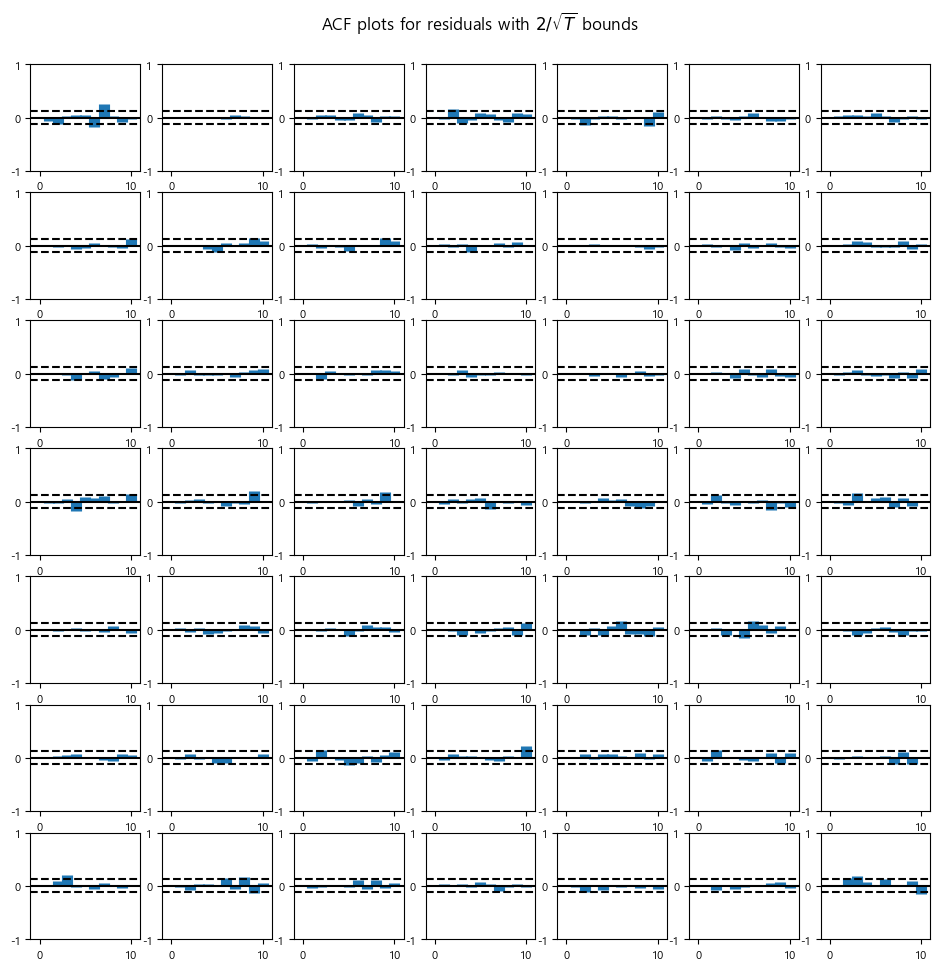

In [164]:
fit.plot_acorr()

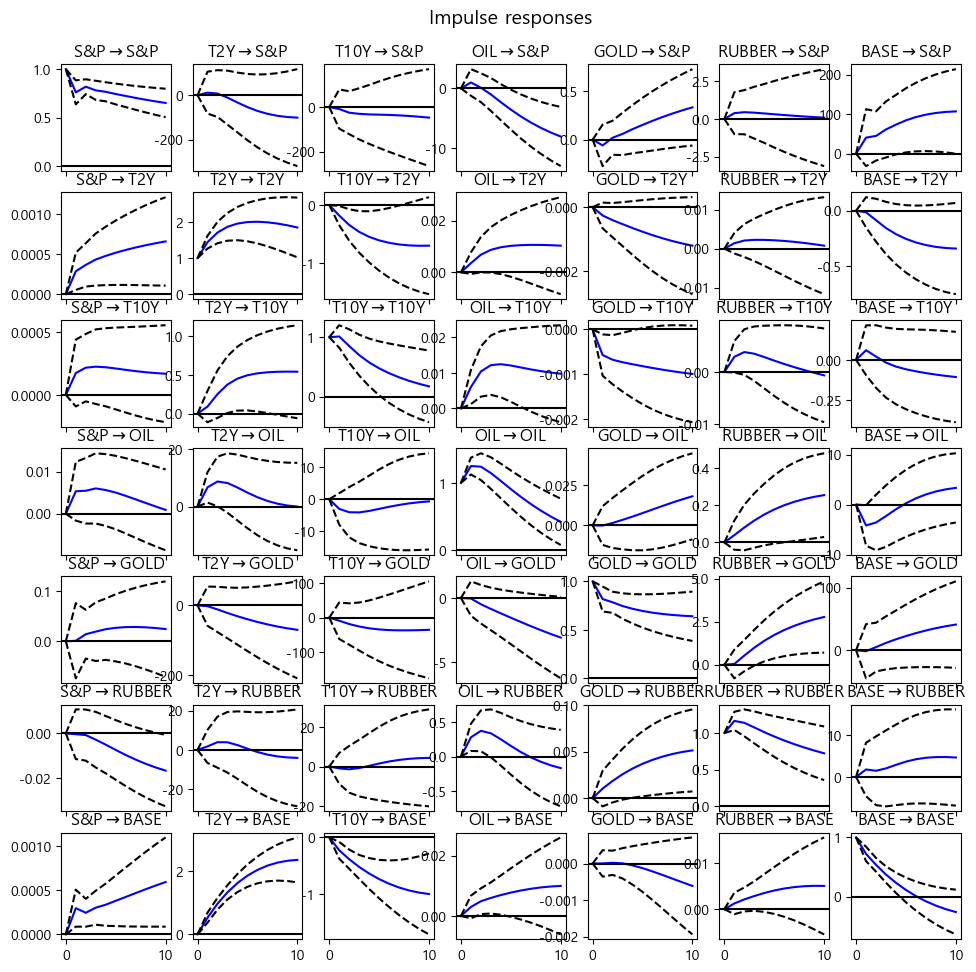

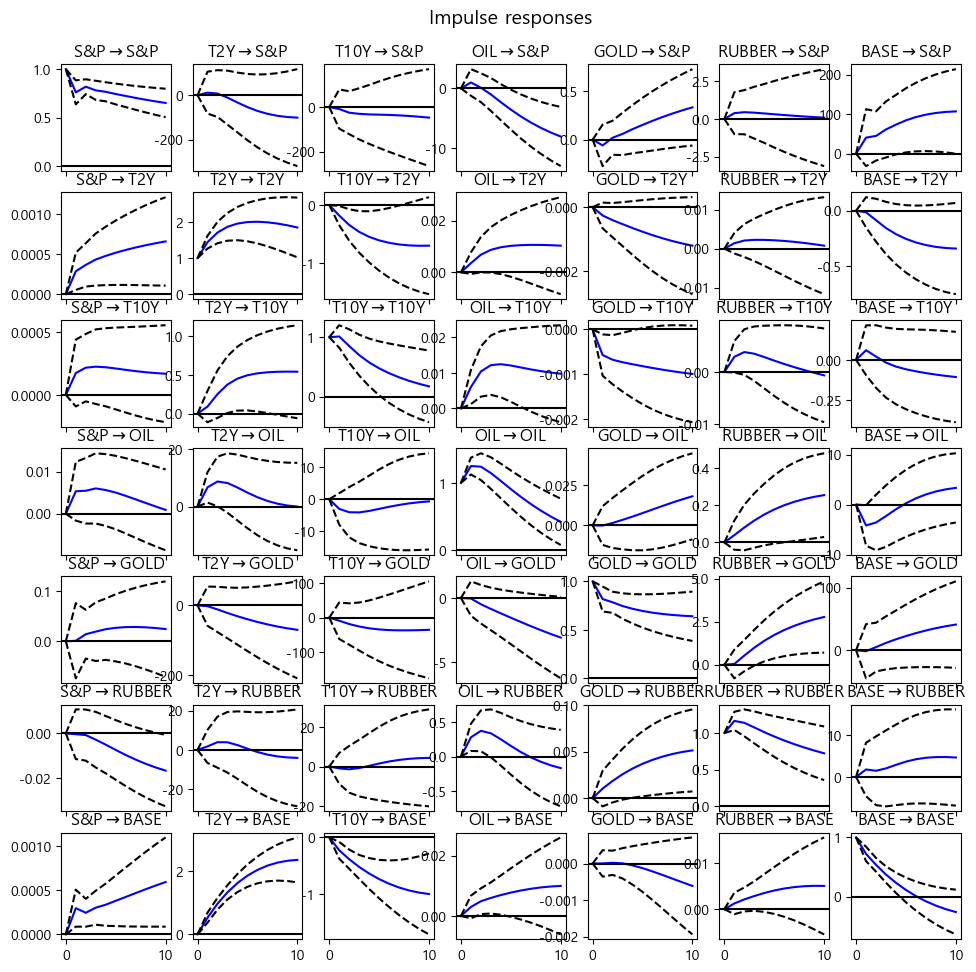

In [165]:
irf = fit.irf(10)
irf.plot(orth=False)

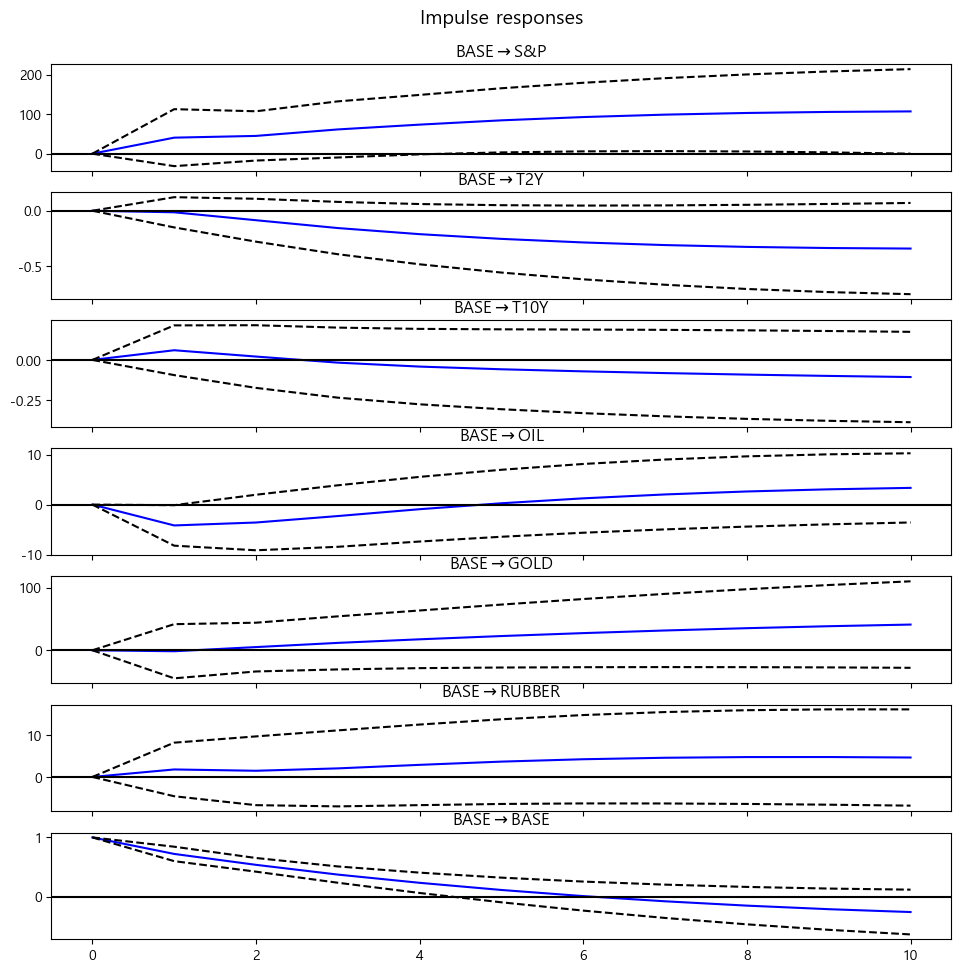

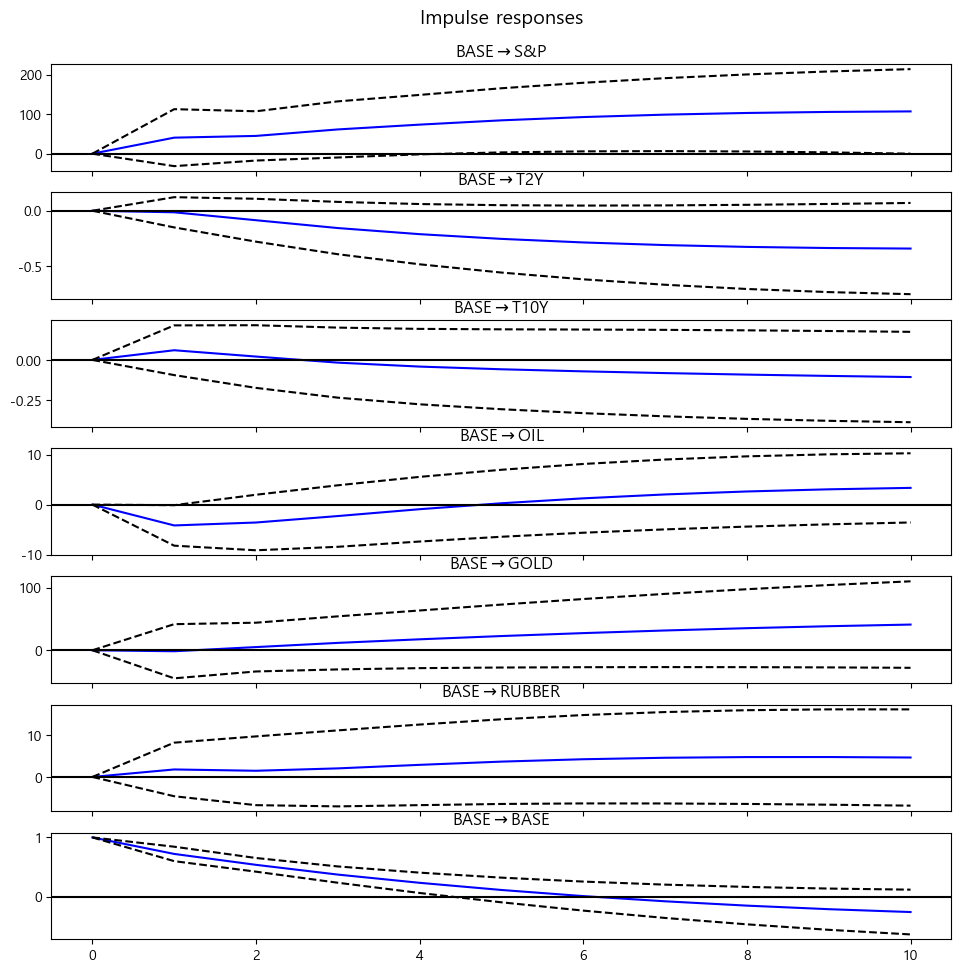

In [166]:
irf.plot(impulse='BASE')

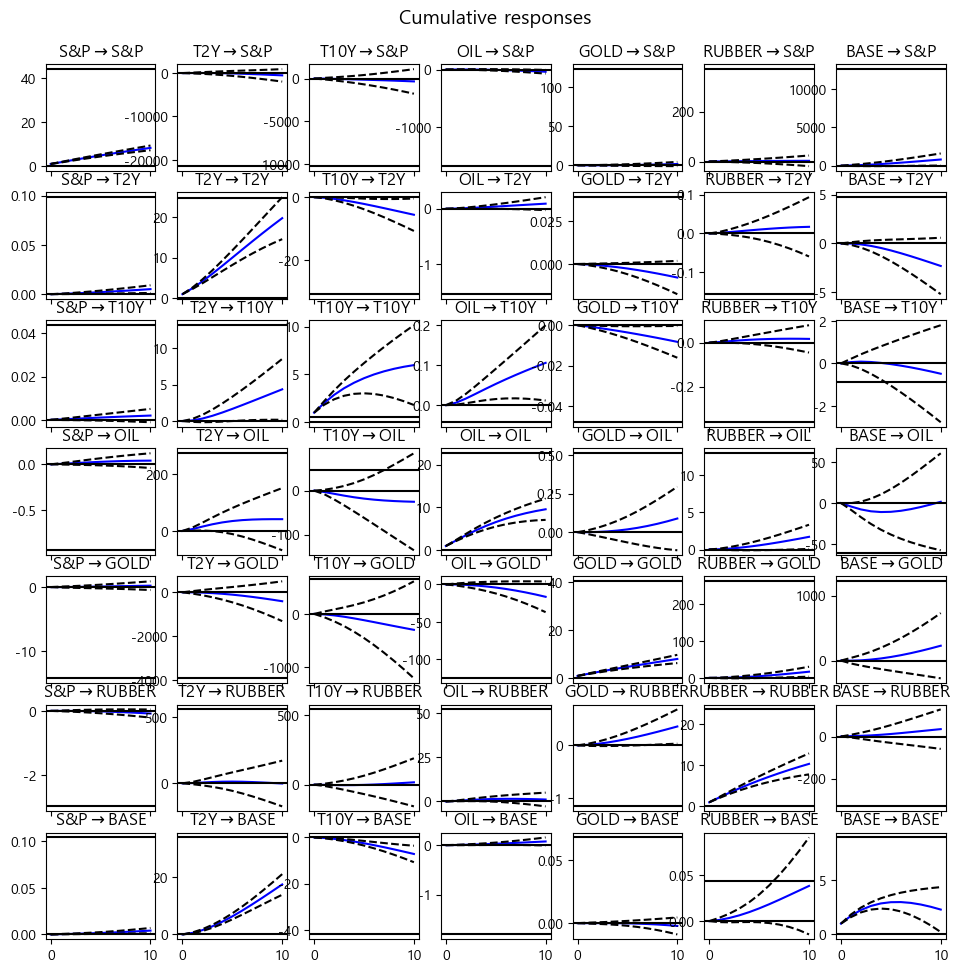

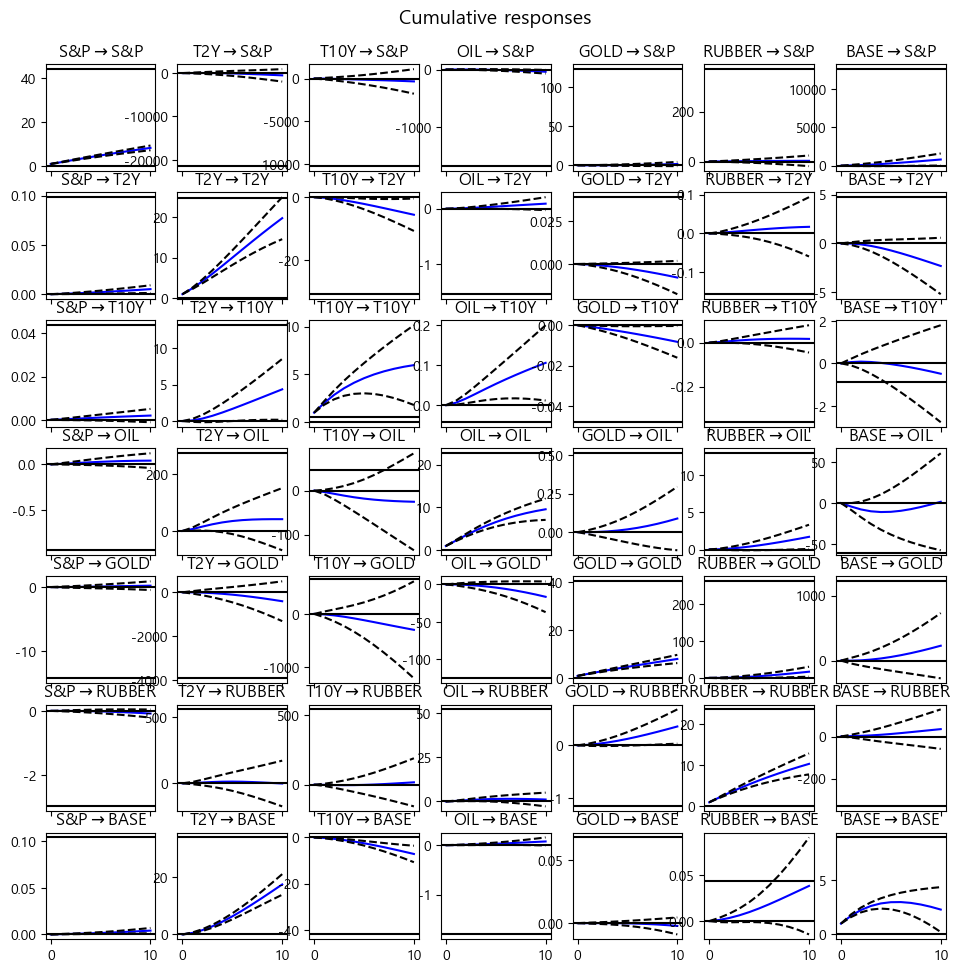

In [167]:
irf.plot_cum_effects(orth=False)